In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train = "https://raw.githubusercontent.com/codejay411/Customer_churn_prediction/main/dataset/train.csv"
test = "https://raw.githubusercontent.com/codejay411/Customer_churn_prediction/main/dataset/test.csv"

In [3]:
df = pd.read_csv(train)
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
df.shape

(36992, 25)

In [5]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [7]:
df.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [8]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

# Handle Missing Data -->>

#### Filling categorical columns -->
#### There are 2 categorical values in which null values are present ==> [ preferred_offer_types ,   region_category ]  

In [11]:
df['region_category'].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

In [12]:
df['region_category'].mode()

0    Town
Name: region_category, dtype: object

In [13]:
# filling NAN Values with most time occur value --->>
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])

In [14]:
df['region_category'].isna().sum()

0

In [15]:
# filling NAN Values with most time occur value --->>
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])

In [16]:
df['preferred_offer_types'].isna().sum()

0

### Filling Numerical Values ---->>

In [17]:
# filling NAN Values with most time occur value --->>
df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].mean())

In [18]:
df['points_in_wallet'].isna().sum()

0

In [19]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


# Data Analysis --->>

In [18]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df) # it will generate a report of overall data 
# profile.to_file(output_file="churn.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Highly Correlated --->>

#### WE will remove anyone of the highly corelated column --->>

In [20]:
# highly corelted --->> # according to
df[['complaint_status','past_complaint']].head()

,complaint_status,past_complaint
0,Not Applicable,No
1,Solved,Yes
2,Solved in Follow-up,Yes
3,Unsolved,Yes
4,Solved,Yes


In [21]:
df.drop('complaint_status',axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36992 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [23]:
# int and float or(NUMERICAL VALUES) --->>

df1 = df[['age','days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet','churn_risk_score']]
df1.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.750000,2
1,32,16,306.34,12838.38,686.882199,1
2,44,14,516.16,21027.00,500.690000,5
3,37,11,53.27,25239.56,567.660000,5
4,31,20,113.13,24483.66,663.060000,5


    Checking distribution of data for every coloumn

c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

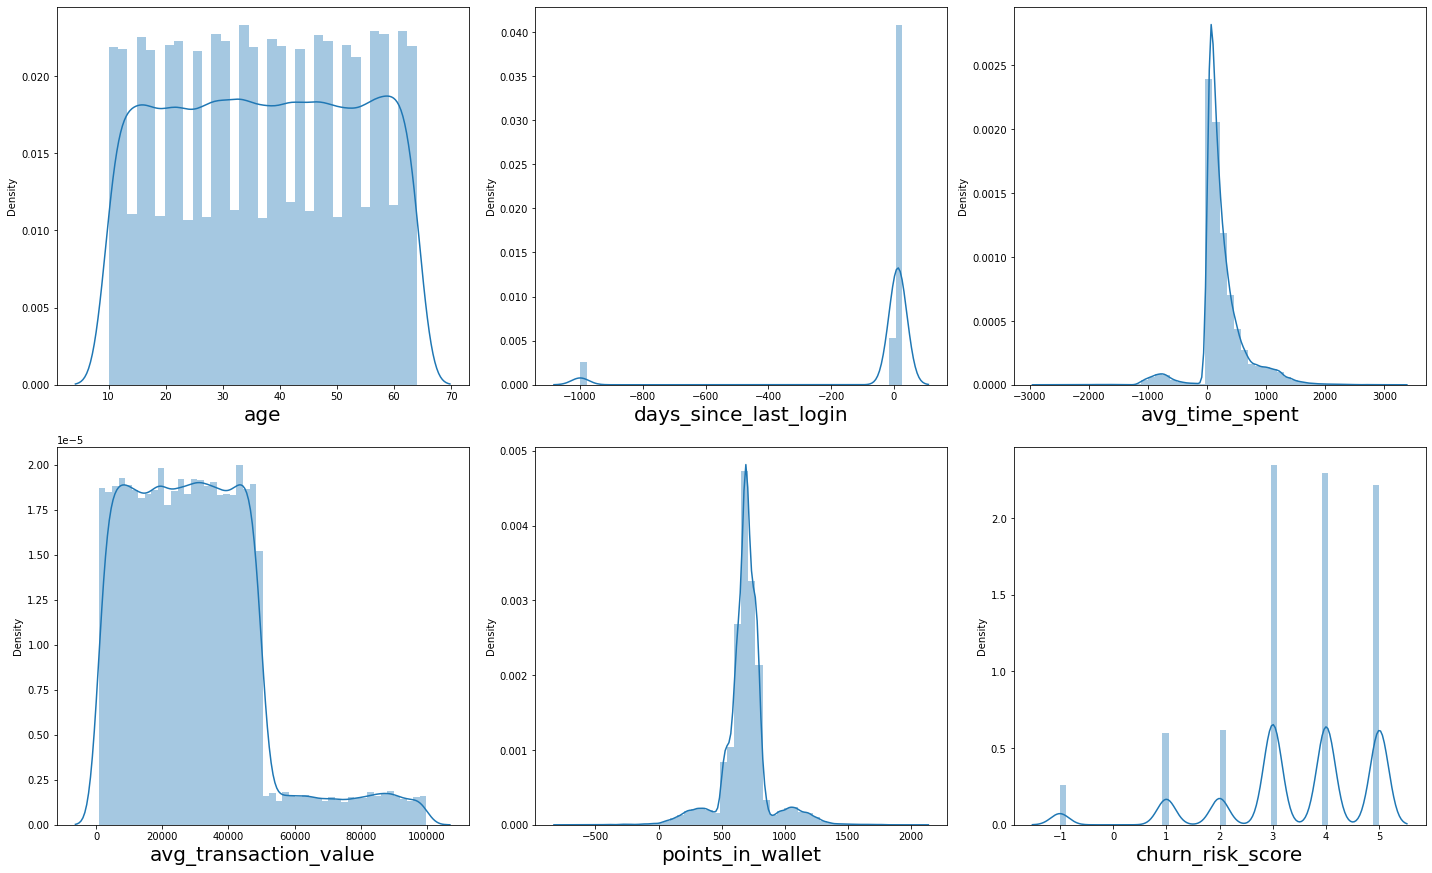

In [24]:
import seaborn as sns 
plt.figure(figsize=(20,30),facecolor='White')
plotnumber = 1

for column in df1:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()

# EDA ---->>

In [17]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Poor Website,5


In [25]:
df[['joining_date']].head()

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12


    seppareting date month year --->>

In [26]:
df['joining_day'] = pd.to_datetime(df.joining_date , format="%Y/%m/%d").dt.day
df['joining_month'] = pd.to_datetime(df.joining_date , format="%Y/%m/%d").dt.month
df['joining_year'] = pd.to_datetime(df.joining_date , format="%Y/%m/%d").dt.year

In [27]:
df.drop(['joining_date'], axis=1 , inplace=True)

In [28]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,17.0,781.750000,Yes,Yes,No,Products always in Stock,2,17,8,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1,28,8,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,22.0,500.690000,No,Yes,Yes,Poor Website,5,11,11,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,6.0,567.660000,No,Yes,Yes,Poor Website,5,29,10,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,16.0,663.060000,No,Yes,Yes,Poor Website,5,12,9,2017


    Sapparating hour minute second

In [29]:
df[['last_visit_time']].head()

,last_visit_time
0,16:08:02
1,12:38:13
2,22:53:21
3,15:57:50
4,15:46:44


In [30]:
df[['last_visit_hour','last_visit_minute','last_visit_second']] = df['last_visit_time'].astype(str).str.split(':',expand=True).astype(int)
df.drop(['last_visit_time'],axis=1,inplace=True)

In [24]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year,last_visit_hour,last_visit_minute,last_visit_second
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,Yes,No,Products always in Stock,2,17,8,2017,16,8,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,No,Yes,Quality Customer Care,1,28,8,2017,12,38,13
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,11,11,2016,22,53,21
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,29,10,2016,15,57,50
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,Yes,Yes,Poor Website,5,12,9,2017,15,46,44


# Handle categorical column -->>

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36992 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [32]:
df['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [33]:
gender = pd.get_dummies(df[['gender']],drop_first=True)
gender.head()

,gender_M,gender_Unknown
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [34]:
df['region_category'].value_counts()

Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64

In [35]:
region = pd.get_dummies(df[['region_category']],drop_first=True)
region.head()

,region_category_Town,region_category_Village
0,0,1
1,0,0
2,1,0
3,0,0
4,0,0


In [36]:
df['membership_category'].value_counts()

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

In [37]:
membership = pd.get_dummies(df[['membership_category']],drop_first=True)
membership.head()

,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [38]:
df.joined_through_referral.value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [39]:
referal = pd.get_dummies(df[['joined_through_referral']],drop_first=True)
referal.head()

,joined_through_referral_No,joined_through_referral_Yes
0,1,0
1,0,0
2,0,1
3,0,1
4,1,0


In [40]:
df.preferred_offer_types.value_counts()

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [41]:
offer = pd.get_dummies(df[['preferred_offer_types']],drop_first=True)
offer.head()

,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [42]:
df.medium_of_operation.value_counts()


Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [43]:
medium = pd.get_dummies(df[['medium_of_operation']], drop_first=True)
medium.head()

,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [44]:
df['internet_option'].value_counts()


Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [45]:

internet = pd.get_dummies(df[['internet_option']], drop_first=True)
internet.head()

,internet_option_Mobile_Data,internet_option_Wi-Fi
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [46]:
df.used_special_discount.value_counts()


Yes    20342
No     16650
Name: used_special_discount, dtype: int64

In [47]:
discount = pd.get_dummies(df[['used_special_discount']], drop_first=True)
discount.head()

,used_special_discount_Yes
0,1
1,1
2,0
3,0
4,0


In [48]:
df.offer_application_preference.value_counts()


Yes    20440
No     16552
Name: offer_application_preference, dtype: int64

In [49]:
application = pd.get_dummies(df[['offer_application_preference']], drop_first=True)
application.head()

,offer_application_preference_Yes
0,1
1,0
2,1
3,1
4,1


In [50]:
df.past_complaint.value_counts()

No     18602
Yes    18390
Name: past_complaint, dtype: int64

In [51]:
complaint = pd.get_dummies(df[['past_complaint']], drop_first=True)
complaint.head()

,past_complaint_Yes
0,0
1,1
2,1
3,1
4,1


In [52]:
df.feedback.value_counts()

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

In [53]:
feedback = pd.get_dummies(df[['feedback']], drop_first=True)
feedback.head()

,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


    # Concatenate dataframe -->

In [54]:
data_train = pd.concat([df, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)
data_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,1,0,0,0,0,1,0,0,0,0
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,0,1,0,0,0,0,1,0,0,0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,1,1,0,0,1,0,0,0,0,0


### drop unnecessary columns

In [55]:
data_train.columns


Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_hour', 'last_visit_minute',
       'last_visit_second', 'gender_M', 'gender_Unknown',
       'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
      

In [56]:
data_train.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

In [57]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [52]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          36992 non-null  int64  
 1   days_since_last_login                        36992 non-null  int64  
 2   avg_time_spent                               36992 non-null  float64
 3   avg_transaction_value                        36992 non-null  float64
 4   points_in_wallet                             36992 non-null  float64
 5   churn_risk_score                             36992 non-null  int64  
 6   joining_day                                  36992 non-null  int64  
 7   joining_month                                36992 non-null  int64  
 8   joining_year                                 36992 non-null  int64  
 9   last_visit_hour                              36992 non-null  int32  
 10

In [58]:
data_train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.00000,36992.000000,36992.000000,...,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397,15.687122,6.53344,2016.006569,11.537711,...,0.552552,0.497135,0.169010,0.171659,0.169523,0.037359,0.036765,0.038306,0.169739,0.037603
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661,8.797726,3.45013,0.819384,6.921573,...,0.497237,0.499999,0.374765,0.377089,0.375218,0.189644,0.188186,0.191936,0.375409,0.190236
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000,1.000000,1.00000,2015.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000,8.000000,4.00000,2015.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000,16.000000,7.00000,2016.000000,12.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000,23.000000,10.00000,2017.000000,18.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000,31.000000,12.00000,2017.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Test Data --->>

In [60]:
tf = pd.read_csv(test)
tf.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [61]:
# preprocessing
# filling categorical missing column
tf['region_category']= tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types']= tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])

# handle numerical missing column
tf['points_in_wallet']= tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

# drop one column
tf.drop('complaint_status', axis=1, inplace=True)

# Exploratory data analysis
tf["joining_day"] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.day
tf["joining_month"] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.month
tf["joining_year"] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.year

tf.drop(["joining_date"], axis=1, inplace=True)

# Extract hour, minutes and second
tf[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = tf['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)

# Now we can drop Arrival_Time as it is of no use
tf.drop(["last_visit_time"], axis = 1, inplace = True)

# Handling categorical data
gender = pd.get_dummies(tf[['gender']], drop_first=True)
region = pd.get_dummies(tf[['region_category']], drop_first=True)
membership = pd.get_dummies(tf[['membership_category']], drop_first=True)
referal = pd.get_dummies(tf[['joined_through_referral']], drop_first=True)
offer = pd.get_dummies(tf[['preferred_offer_types']], drop_first=True)
medium = pd.get_dummies(tf[['medium_of_operation']], drop_first=True)
internet = pd.get_dummies(tf[['internet_option']], drop_first=True)
discount = pd.get_dummies(tf[['used_special_discount']], drop_first=True)
application = pd.get_dummies(tf[['offer_application_preference']], drop_first=True)
complaint = pd.get_dummies(tf[['past_complaint']], drop_first=True)
feedback = pd.get_dummies(tf[['feedback']], drop_first=True)

data_test = pd.concat([tf, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)

data_test.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

data_test.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,50,12,386.26,40721.44,733.830000,2,11,2015,7,19,...,0,0,0,1,0,0,0,0,0,0
1,41,11,37.80,9644.40,726.000000,1,3,2016,22,21,...,0,0,0,0,1,0,0,0,0,0
2,31,18,215.36,3693.25,713.780000,3,3,2017,16,40,...,0,1,0,0,0,0,0,0,0,0
3,64,-999,44.57,36809.56,744.970000,18,8,2017,14,56,...,0,1,0,0,0,0,0,0,1,0
4,16,6,349.88,40675.86,299.048351,5,5,2015,2,57,...,1,1,0,0,1,0,0,0,0,0


In [62]:
data_test.shape

(19919, 40)

# Feature Selection --->>

finding out the best feature will contribute and have good relationship with target variables.

In [63]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [64]:
data_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_hour',
       'last_visit_minute', 'last_visit_second', 'gender_M', 'gender_Unknown',
       'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'past_compla

In [65]:
x =  data_train.loc[:,['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_hour',
       'last_visit_minute', 'last_visit_second', 'gender_M', 'gender_Unknown',
       'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'past_complaint_Yes', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_Too many ads',
       'feedback_User Friendly Website']]

In [66]:
x.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_hour,last_visit_minute,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,17,8,2017,16,8,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,28,8,2017,12,38,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,11,11,2016,22,53,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,29,10,2016,15,57,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,12,9,2017,15,46,...,1,1,0,0,1,0,0,0,0,0


In [67]:
y = data_train[['churn_risk_score']]

In [68]:
y.head()

,churn_risk_score
0,2
1,1
2,5
3,5
4,5


    important feature using extratreeregressor --->

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

C:\Users\RISHAB~1\AppData\Local\Temp/ipykernel_15688/1289823182.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(x,y)


ExtraTreesRegressor()

In [71]:
print(selection.feature_importances_)

[0.0242046  0.02078062 0.02491313 0.07227198 0.07994692 0.02415925
 0.02297869 0.01399913 0.02363007 0.02386265 0.02475298 0.00994978
 0.00033255 0.0109649  0.00729356 0.02872808 0.13432226 0.03489082
 0.02915689 0.05236286 0.008513   0.00876274 0.00987813 0.00978824
 0.00613252 0.00818962 0.00815952 0.00903299 0.00993369 0.00796282
 0.00713341 0.01146211 0.00816332 0.00807503 0.00658373 0.05099087
 0.05404747 0.04819794 0.00742698 0.04806415]


    # PLOTING GRAPH --->>

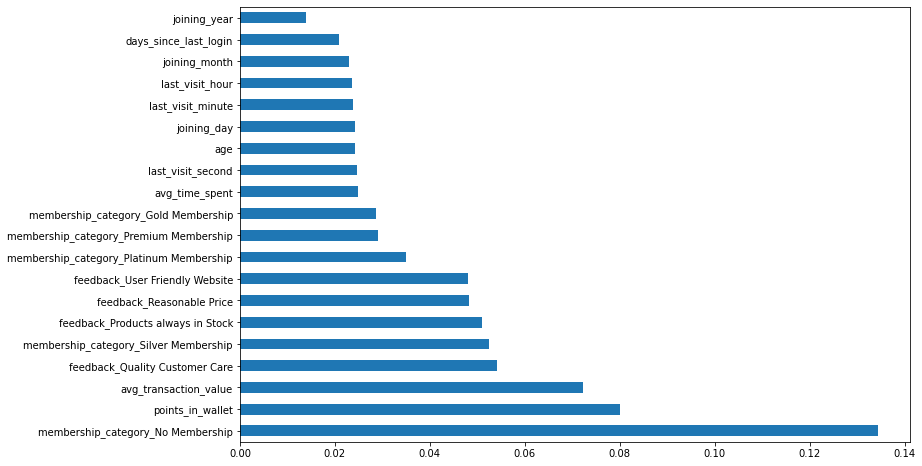

In [72]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# model training --->>

In [73]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [75]:
x_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_hour,last_visit_minute,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
3313,49,2,572.770000,19641.41,600.540000,26,3,2015,7,26,...,1,1,0,0,0,0,0,0,1,0
28260,42,16,1427.643434,48511.87,700.920000,2,10,2015,11,43,...,1,1,1,0,0,0,0,0,0,0
31412,10,-999,-779.419727,46612.57,744.650000,8,4,2016,2,41,...,1,1,0,0,0,0,0,0,1,0
6700,12,9,245.010000,95291.95,686.882199,23,2,2016,15,29,...,0,1,0,0,0,0,0,1,0,0
31958,28,14,308.770000,45564.89,716.280000,2,1,2017,10,59,...,0,1,0,0,1,0,0,0,0,0


In [76]:
x_train.shape

(29593, 40)

# RANDOM FOREST ---->>

In [77]:
# randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\RISHAB~1\AppData\Local\Temp/ipykernel_15688/3262487550.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [100]:
# checking training accuracy
print("training accuracy is : ", rf.score(x_train, y_train))

training accuracy is :  0.968675024499037


In [81]:
# checking accuracy of test dataset
print("testing accuracy is : ", rf.score(x_test, y_test))

testing accuracy is :  0.7498310582511151


# DECISION TREE ----->>> 

In [82]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [83]:
# checking accuracy of test dataset
print("testing accuracy is : ", model.score(x_test, y_test)*100)

testing accuracy is :  70.6311663738343


# XGBOOST ---->>>

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
# XGBoost clasifier
from xgboost import XGBClassifier
xg = XGBClassifier(objective='binary:logistic')
xg.fit(x_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [86]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

NameError: name 'xg' is not defined

# Hyperparameter Tuning --->>

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [99]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)


NameError: name 'XGBClassifier' is not defined

In [96]:
grid.fit(x_train, y_train)


NameError: name 'grid' is not defined

In [104]:
grid.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.5}

In [105]:
xg = XGBClassifier(n_estimators= 100, max_depth= 5, learning_rate= 0.1)
xg.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [106]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  75.75348020002704


In [107]:
import pickle
file = 'xgboost_model.pkl'
pickle.dump(xg, open(file, 'wb'))

In [108]:
load_model = pickle.load(open(file, 'rb'))

In [109]:
y_prep = load_model.predict(x_test)

In [110]:
y_prep

array([1, 4, 5, ..., 3, 3, 4], dtype=int64)